In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


>The new buzz in the market i.e. Cryptocurrency and people investing in their coins. The real talk is whether investing money in such a volatile currency safe or not? We can't be 100% sure of Investing in these coins but we indeed can generate an approximate value-based algorithm to secure our investment.

>One such technique is Time Series Analysis.

> We want to use moving averages to make investment decisions - to decide when to BUY/SELL shares in Tata Consultancy Services (TCS).



# **Prepare Data**

**Read TCS.NS.csv dataset**

Tata Consultancy Services (TCS) stocks dataset
> It has 6 columns in total, i.e. Open, High, Low, Close, Adjusted Close prices, and a Volume column as well.

> We will use the **Adjusted Close Price** series which reflects the dividends, stock splits & various corporate events that affect the stock returns.


In [ ]:
df = pd.read_csv('/content/TCS.NS.csv', index_col = 'Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-29,1308.500000,1324.300049,1298.619995,1305.150024,1124.963257,4423532.0
2015-06-01,1304.719971,1323.550049,1304.180054,1308.880005,1128.178467,882264.0
2015-06-02,1308.000000,1315.000000,1295.250000,1299.949951,1120.481323,3935820.0
2015-06-03,1302.000000,1312.800049,1295.250000,1305.449951,1125.222168,1804684.0
2015-06-04,1308.550049,1311.400024,1294.250000,1302.819946,1122.955322,4131468.0
...,...,...,...,...,...,...
2020-05-21,1946.000000,1998.000000,1941.150024,1991.199951,1991.199951,3400908.0
2020-05-22,1977.099976,2032.000000,1961.250000,2020.349976,2020.349976,3663418.0
2020-05-26,2015.000000,2024.000000,1925.000000,1943.000000,1943.000000,4575317.0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-29,1308.500000,1324.300049,1298.619995,1305.150024,1124.963257,4423532.0
2015-06-01,1304.719971,1323.550049,1304.180054,1308.880005,1128.178467,882264.0
2015-06-02,1308.000000,1315.000000,1295.250000,1299.949951,1120.481323,3935820.0
2015-06-03,1302.000000,1312.800049,1295.250000,1305.449951,1125.222168,1804684.0
2015-06-04,1308.550049,1311.400024,1294.250000,1302.819946,1122.955322,4131468.0
...,...,...,...,...,...,...
2020-05-21,1946.000000,1998.000000,1941.150024,1991.199951,1991.199951,3400908.0
2020-05-22,1977.099976,2032.000000,1961.250000,2020.349976,2020.349976,3663418.0
2020-05-26,2015.000000,2024.000000,1925.000000,1943.000000,1943.000000,4575317.0


**Checking if any column has any empty value:**

In [ ]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

**Dropping the empty data entries:**

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Selects the 'Adj Close' column**

In [ ]:
df['Adj Close']

Date
2015-05-29    1124.963257
2015-06-01    1128.178467
2015-06-02    1120.481323
2015-06-03    1125.222168
2015-06-04    1122.955322
                 ...     
2020-05-21    1991.199951
2020-05-22    2020.349976
2020-05-26    1943.000000
2020-05-27    2005.300049
2020-05-28    2004.300049
Name: Adj Close, Length: 1228, dtype: float64

**Converts the date strings in the index into pandas datetime format**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 2015-05-29 to 2020-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1228 non-null   float64
 1   High       1228 non-null   float64
 2   Low        1228 non-null   float64
 3   Close      1228 non-null   float64
 4   Adj Close  1228 non-null   float64
 5   Volume     1228 non-null   float64
dtypes: float64(6)
memory usage: 99.4+ KB


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df['Adj Close']

Date
2015-05-29    1124.963257
2015-06-01    1128.178467
2015-06-02    1120.481323
2015-06-03    1125.222168
2015-06-04    1122.955322
                 ...     
2020-05-21    1991.199951
2020-05-22    2020.349976
2020-05-26    1943.000000
2020-05-27    2005.300049
2020-05-28    2004.300049
Name: Adj Close, Length: 1228, dtype: float64

Date
2015-05-29    1124.963257
2015-06-01    1128.178467
2015-06-02    1120.481323
2015-06-03    1125.222168
2015-06-04    1122.955322
                 ...     
2020-05-21    1991.199951
2020-05-22    2020.349976
2020-05-26    1943.000000
2020-05-27    2005.300049
2020-05-28    2004.300049
Name: Adj Close, Length: 1228, dtype: float64

### **Plot the price series for visual inspection**

Text(0.5, 0, 'Date')

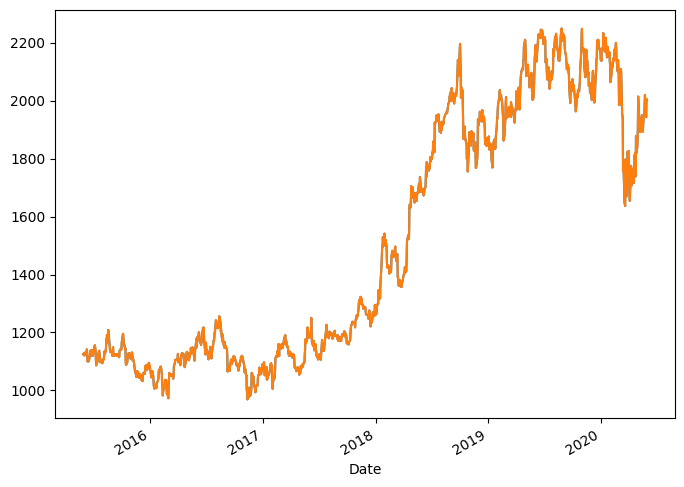

In [ ]:
df['Adj Close'].plot(figsize = (8, 6))
plt.plot(df.index, df['Adj Close'])
plt.xlabel('Date')

<Axes: xlabel='Date'>

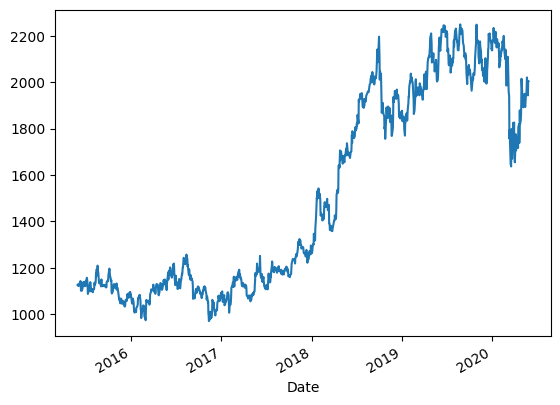

#**Simple Moving Average (SMA):**

This domain uses a **sliding window** to take the average over a set number of time periods. It is an eqaully weighted mean of the previous *n* data.

Our dataset has a stock record of upto 5 years. So, using Pandas built-in library does a lot of help.

Pandas makes calculating a 50-day moving average easy. Using the rolling() method we set a 50-day window, on which we calculate the arithmetic average (mean) using the mean() method:

### **Calculate the 20 days moveing average**

In [ ]:
df['sma20'] = df['Adj Close'].rolling(window = 20).mean()
df['sma20']

<ipython-input-51-796698474012>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma20'] = df['Adj Close'].rolling(window = 20).mean()


Date
2015-05-29            NaN
2015-06-01            NaN
2015-06-02            NaN
2015-06-03            NaN
2015-06-04            NaN
                 ...     
2020-05-21    1916.657501
2020-05-22    1923.762500
2020-05-26    1929.984998
2020-05-27    1938.420001
2020-05-28    1945.682501
Name: sma20, Length: 1228, dtype: float64

### **Plot the Adjusted Price and SMAs (20 dayas)**

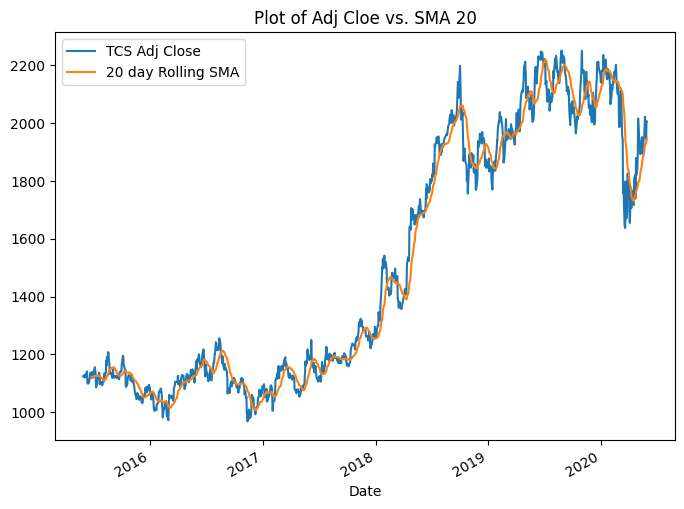

In [ ]:
df['Adj Close'].plot(label = 'TCS Adj Close', figsize = (8, 6))
df['sma20'].plot(label = '20 day Rolling SMA')
plt.xlabel('Date')
plt.title('Plot of Adj Cloe vs. SMA 20')
plt.legend()
plt.show()

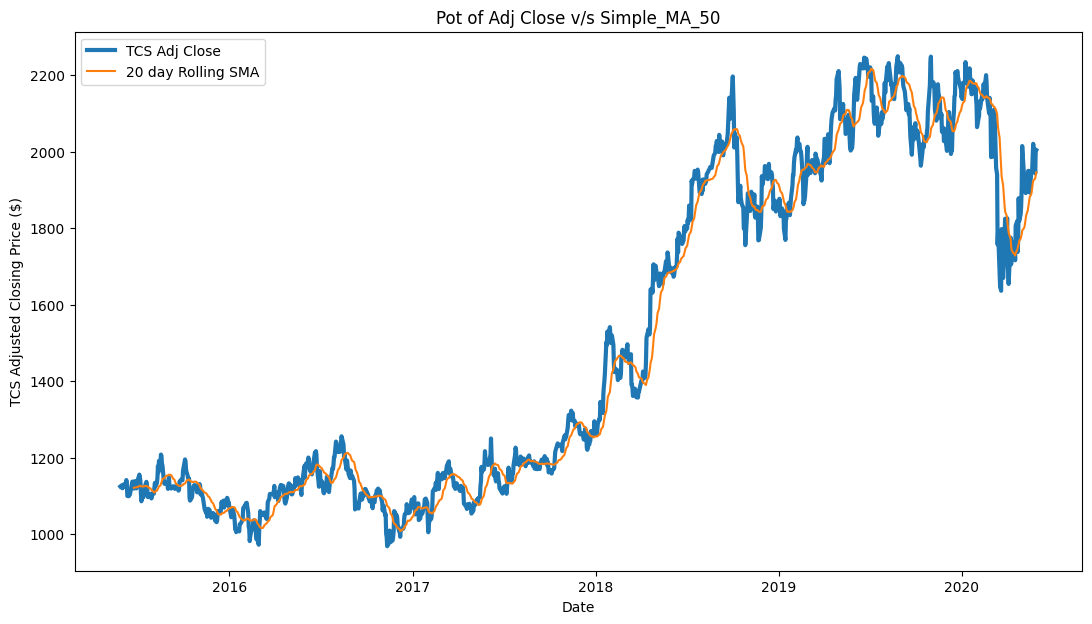

### **Calculate the 50 days moveing average**

In [ ]:
df['sma50'] = df['Adj Close'].rolling(window = 50).mean()
df['sma50']

<ipython-input-53-20e074124528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma50'] = df['Adj Close'].rolling(window = 50).mean()


Date
2015-05-29            NaN
2015-06-01            NaN
2015-06-02            NaN
2015-06-03            NaN
2015-06-04            NaN
                 ...     
2020-05-21    1833.866743
2020-05-22    1832.081018
2020-05-26    1828.919050
2020-05-27    1829.864177
2020-05-28    1831.159600
Name: sma50, Length: 1228, dtype: float64

### **Plot the Adjusted Price and SMAs (50 dayas)**



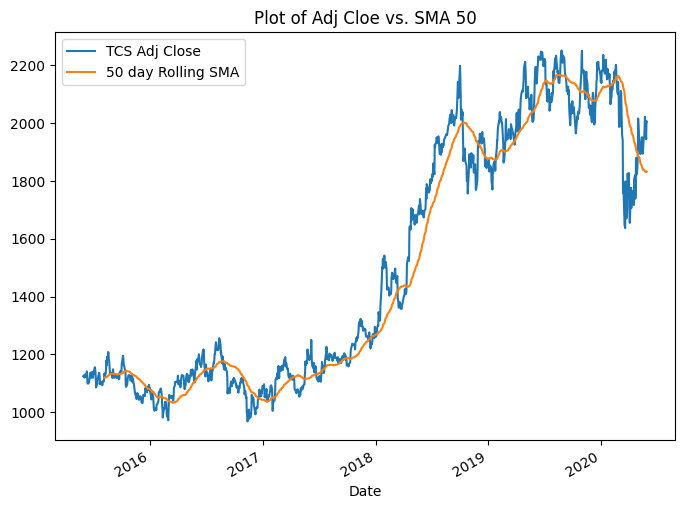

In [ ]:
df['Adj Close'].plot(label = 'TCS Adj Close', figsize = (8, 6))
df['sma50'].plot(label = '50 day Rolling SMA')
plt.xlabel('Date')
plt.title('Plot of Adj Cloe vs. SMA 50')
plt.legend()
plt.show()

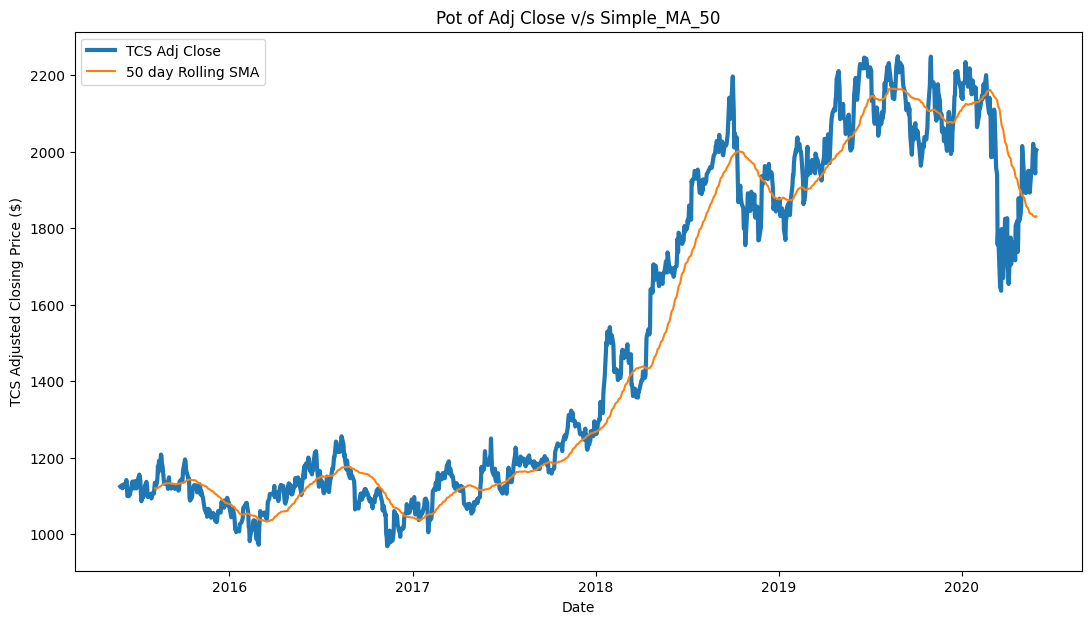

### **Using 20 day Rolling SMA & 50 day Rolling SMA; Plot the Adjusted Price and two SMAs for The Corona Period:**

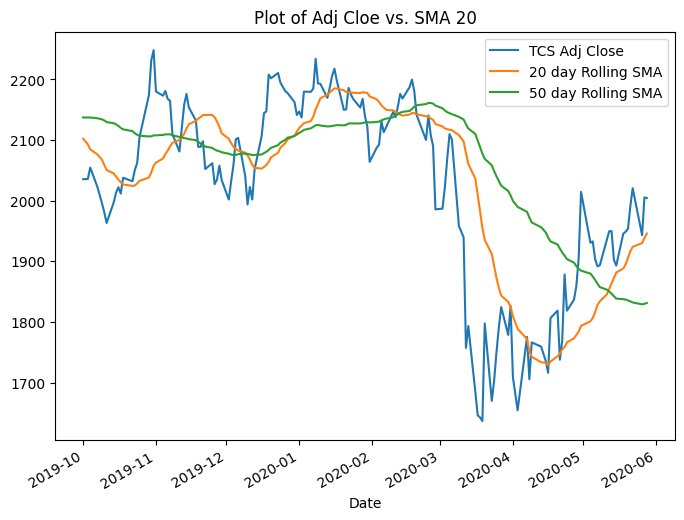

In [ ]:
df['2019-10-01':'2020-06-01']['Adj Close'].plot(label = 'TCS Adj Close', figsize = (8, 6))
df['2019-10-01':'2020-06-01']['sma20'].plot(label = '20 day Rolling SMA')
df['2019-10-01':'2020-06-01']['sma50'].plot(label = '50 day Rolling SMA')
plt.xlabel('Date')
plt.title('Plot of Adj Cloe vs. SMA 20')
plt.legend()
plt.show()

#**Exponential Moving Average (EMA):**



> Unlike **SMA** and **CMA**, ***Exponential moving average ***gives more weight to the **recent prices** and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data. You can use .ewm() method from pandas and set span parameter to the EMA value.



### **Calculate the 50 days exponentaial moveing average**

In [ ]:
df['ema50'] = df['Adj Close'].ewm(span = 50, adjust = False).mean()
df['ema50']

<ipython-input-58-fc15e250de78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ema50'] = df['Adj Close'].ewm(span = 50, adjust = False).mean()


Date
2015-05-29    1124.963257
2015-06-01    1125.089344
2015-06-02    1124.908637
2015-06-03    1124.920932
2015-06-04    1124.843850
                 ...     
2020-05-21    1900.889380
2020-05-22    1905.574109
2020-05-26    1907.041791
2020-05-27    1910.895056
2020-05-28    1914.557997
Name: ema50, Length: 1228, dtype: float64

### **Plot the Adjusted Price, 50 days SMA and 50 dayas EMA**



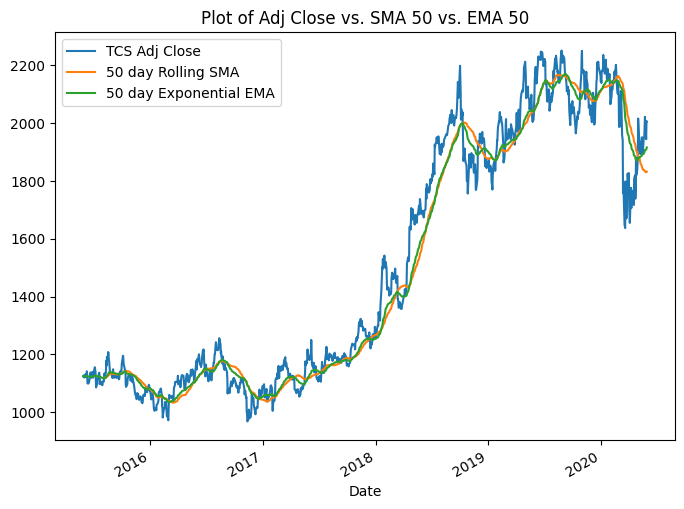

In [ ]:
df['Adj Close'].plot(label = 'TCS Adj Close', figsize = (8, 6))
df['sma50'].plot(label = '50 day Rolling SMA')
df['ema50'].plot(label = '50 day Exponential EMA')
plt.xlabel('Date')
plt.title('Plot of Adj Close vs. SMA 50 vs. EMA 50')
plt.legend()
plt.show()

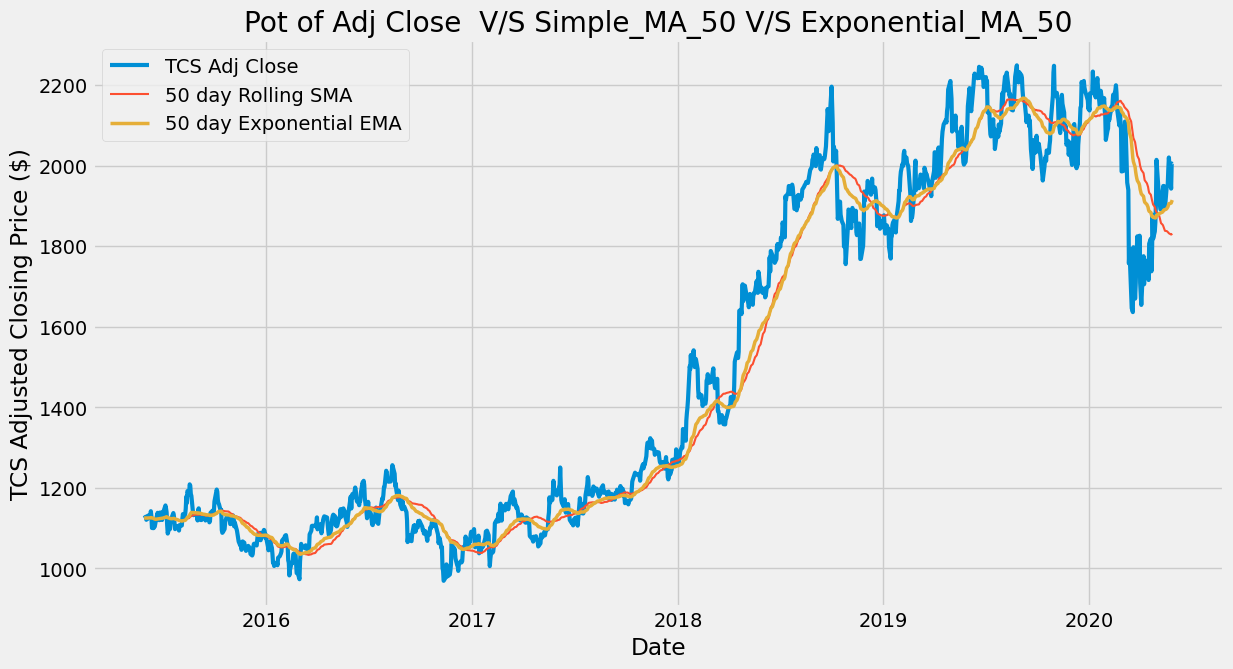

# **Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.**

### **Calculate EMA for 20 days and 5 days**

In [ ]:
df['ema20'] = df['Adj Close'].ewm(span = 20, adjust = False).mean()
df['ema5'] = df['Adj Close'].ewm(span = 5, adjust = False).mean()

<ipython-input-60-737183081244>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ema20'] = df['Adj Close'].ewm(span = 20, adjust = False).mean()
<ipython-input-60-737183081244>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ema5'] = df['Adj Close'].ewm(span = 5, adjust = False).mean()


### **Plot the Adjusted Price with 50, 20, and 5 days EMA**



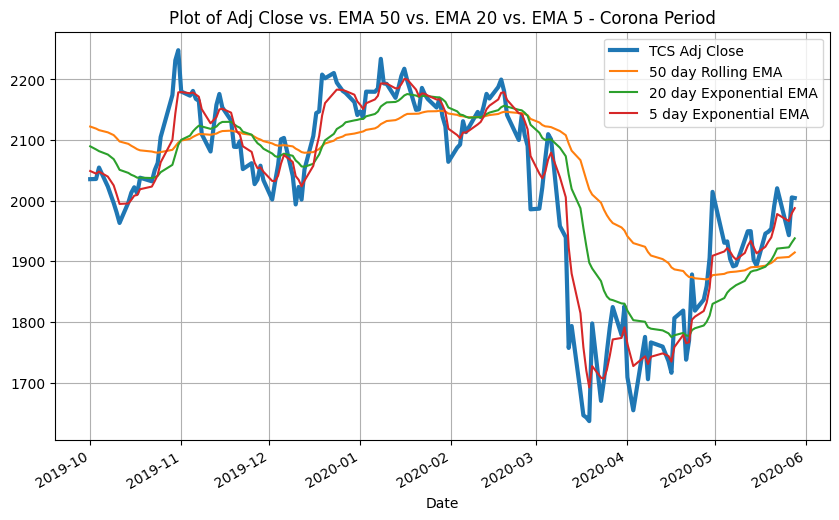

In [ ]:
df['2019-10-01':'2020-06-01']['Adj Close'].plot(label = 'TCS Adj Close', figsize = (10, 6), linewidth = 3)
df['2019-10-01':'2020-06-01']['ema50'].plot(label = '50 day Rolling EMA')
df['2019-10-01':'2020-06-01']['ema20'].plot(label = '20 day Exponential EMA')
df['2019-10-01':'2020-06-01']['ema5'].plot(label = '5 day Exponential EMA')
plt.xlabel('Date')
plt.title('Plot of Adj Close vs. EMA 50 vs. EMA 20 vs. EMA 5 - Corona Period')
plt.legend()
plt.grid(True)
plt.show()

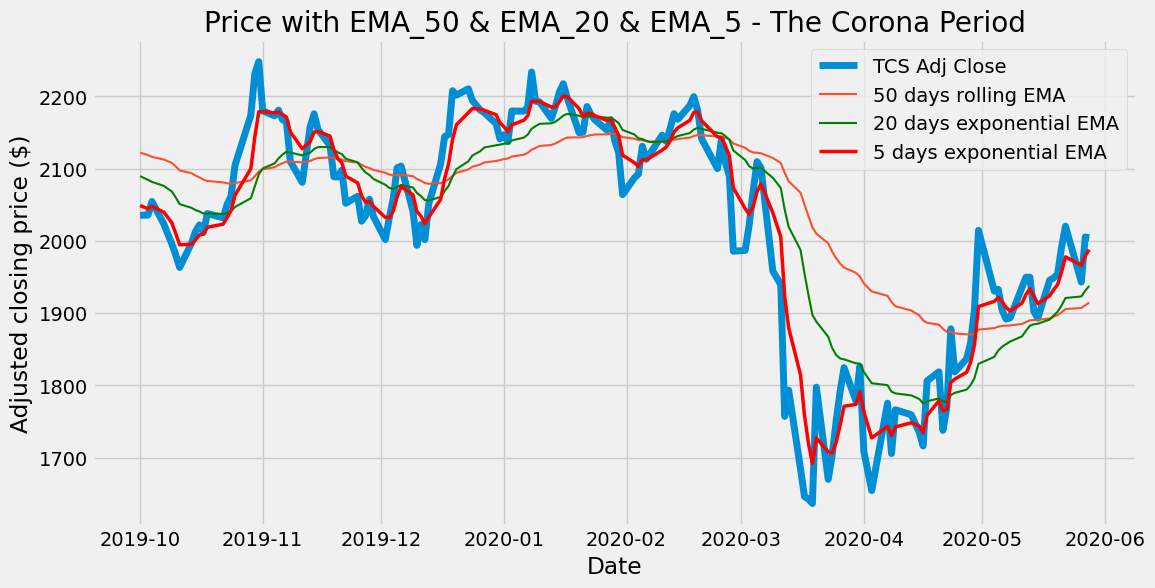